In [63]:
import numpy as np
import pandas as pd
import os
import pickle
import seaborn as sns
from sklearn.manifold import TSNE
from scipy import stats

In [64]:
dataset_directory=os.path.join("..","api","dataset","v2")

In [74]:
with open(os.path.join(dataset_directory, "bibtex",'train.pickle'), 'rb') as f:
    X_train, y_train, feature_names, label_names = pickle.load(f)

In [75]:
X_train=pd.DataFrame(X_train.todense(),columns=[feature_names[x][0] for x in range(X_train.shape[1])])
y_train=pd.DataFrame(y_train.todense(),columns=[label_names[x][0] for x in range(y_train.shape[1])])

In [76]:
print(X_train.shape)
print(y_train.shape)

(4880, 1836)
(4880, 159)


In [83]:
X_train.sum().sort_values().head(10)

en           14.0
political    14.0
genes        15.0
ber          15.0
markets      16.0
nicht        17.0
dem          18.0
auch         18.0
medical      19.0
la           19.0
dtype: float64

In [82]:
X_train.sum().sort_values().tail(10)

is     3109.0
on     3283.0
for    3487.0
to     3939.0
in     4075.0
a      4093.0
and    4280.0
the    4432.0
of     4450.0
n      4774.0
dtype: float64

### 文本预处理
+ 删除 stopwords
+ 删除低频词与高频词
+ 删除长度小于 2 的词

In [58]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [59]:
tobedrop = set(X_train.columns) & set(sw)
tobedrop = tobedrop | set(X_train.sum()[X_train.sum() < 100].index) | set(X_train.sum()[X_train.sum() > 300].index)
tobedrop = tobedrop | (set(X_train.columns) & set([chr(x) for x in range(97,97+26)])) | set([item for item in X_train.columns if len(item) <= 2])
len(tobedrop)

1278

In [60]:
X_train.drop(columns=tobedrop,inplace=True)

<AxesSubplot:>

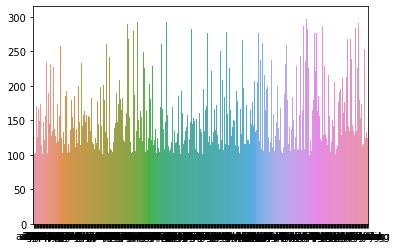

In [61]:
sns.barplot(x=X_train.columns,y=X_train.sum())

/Users/phlin/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/phlin/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='v2'>

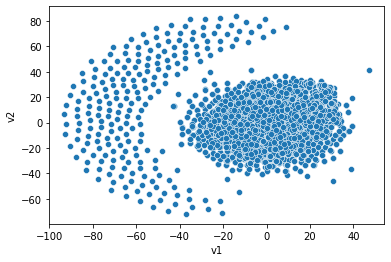

In [167]:
t_sne = TSNE()
t_sne.fit(X_train)
t_sne = pd.DataFrame(t_sne.embedding_, columns=["v1","v2"], index=X_train.index)
sns.scatterplot(data=t_sne, x="v1", y="v2",palette="tab10")

/Users/phlin/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/phlin/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='v2'>

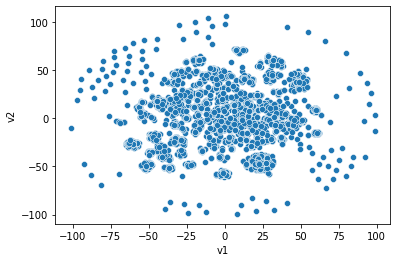

In [9]:
t_sne = TSNE()
t_sne.fit(y_train)
t_sne = pd.DataFrame(t_sne.embedding_, columns=["v1","v2"], index=y_train.index)
sns.scatterplot(data=t_sne, x="v1", y="v2",palette="tab10")

In [23]:
print("mean:", np.mean(y_train.sum(axis=1)), "labels")
print("max:", np.max(y_train.sum(axis=1)), "labels")
print("min:", np.min(y_train.sum(axis=1)), "labels")
print("median:", np.median(y_train.sum(axis=1)), "labels")
print("mode:", stats.mode(y_train.sum(axis=1))[0], "labels")

mean: 2.380327868852459 labels
max: 28 labels
min: 1 labels
median: 2.0 labels
mode: [1] labels


In [28]:
for i in range(1,29):
    print(i,"labels:", len(y_train.sum(axis=1)[y_train.sum(axis=1) == i]))

1 labels: 1849
2 labels: 1230
3 labels: 885
4 labels: 427
5 labels: 256
6 labels: 120
7 labels: 58
8 labels: 27
9 labels: 7
10 labels: 5
11 labels: 5
12 labels: 7
13 labels: 2
14 labels: 0
15 labels: 0
16 labels: 1
17 labels: 0
18 labels: 0
19 labels: 0
20 labels: 0
21 labels: 0
22 labels: 0
23 labels: 0
24 labels: 0
25 labels: 0
26 labels: 0
27 labels: 0
28 labels: 1


In [29]:
X_train["label_num"] = y_train.sum(axis=1)

In [51]:
print(y_train.loc[X_train["label_num"] == 2].shape)
for idx, data in y_train.loc[X_train["label_num"] == 2].iterrows():
    print(idx, data[data == 1].index)

(1230, 159)
2 Index(['TAG_statphys23', 'TAG_topic6'], dtype='object')
4 Index(['TAG_engineering', 'TAG_software'], dtype='object')
5 Index(['TAG_learning', 'TAG_survey'], dtype='object')
6 Index(['TAG_evolution', 'TAG_software'], dtype='object')
13 Index(['TAG_folksonomy', 'TAG_informationretrieval'], dtype='object')
14 Index(['TAG_science', 'TAG_social'], dtype='object')
21 Index(['TAG_evolution', 'TAG_software'], dtype='object')
27 Index(['TAG_evolution', 'TAG_model'], dtype='object')
30 Index(['TAG_bettasplendens', 'TAG_model'], dtype='object')
39 Index(['TAG_networks', 'TAG_software'], dtype='object')
40 Index(['TAG_compounds', 'TAG_psycholinguistics'], dtype='object')
45 Index(['TAG_knowledge', 'TAG_web'], dtype='object')
46 Index(['TAG_software', 'TAG_visualization'], dtype='object')
52 Index(['TAG_mathgamespatterns', 'TAG_theory'], dtype='object')
55 Index(['TAG_search', 'TAG_web'], dtype='object')
56 Index(['TAG_electrochemistry', 'TAG_immunoassay'], dtype='object')
57 Index(['

2832 Index(['TAG_education', 'TAG_learning'], dtype='object')
2833 Index(['TAG_physics', 'TAG_science'], dtype='object')
2846 Index(['TAG_evolution', 'TAG_requirements'], dtype='object')
2849 Index(['TAG_statphys23', 'TAG_topic3'], dtype='object')
2851 Index(['TAG_social', 'TAG_technology'], dtype='object')
2857 Index(['TAG_cognition', 'TAG_mathematics'], dtype='object')
2858 Index(['TAG_competition', 'TAG_immunoassay'], dtype='object')
2859 Index(['TAG_complexity', 'TAG_evolution'], dtype='object')
2863 Index(['TAG_clustering', 'TAG_evaluation'], dtype='object')
2864 Index(['TAG_knowledge', 'TAG_ontology'], dtype='object')
2865 Index(['TAG_semantic', 'TAG_wiki'], dtype='object')
2868 Index(['TAG_development', 'TAG_narrative'], dtype='object')
2869 Index(['TAG_antibody', 'TAG_ldl'], dtype='object')
2874 Index(['TAG_statphys23', 'TAG_topic4'], dtype='object')
2876 Index(['TAG_data', 'TAG_date'], dtype='object')
2878 Index(['TAG_statphys23', 'TAG_topic4'], dtype='object')
2881 Index(['TA

In [52]:
print(y_train.loc[X_train["label_num"] == 3].shape)
for idx, data in y_train.loc[X_train["label_num"] == 3].iterrows():
    print(idx, data[data == 1].index)

(885, 159)
3 Index(['TAG_folksonomy', 'TAG_social', 'TAG_tagging'], dtype='object')
10 Index(['TAG_2006', 'TAG_ontologies', 'TAG_semanticweb'], dtype='object')
18 Index(['TAG_knowledge', 'TAG_learning', 'TAG_narrative'], dtype='object')
19 Index(['TAG_2005', 'TAG_compounds', 'TAG_psycholinguistics'], dtype='object')
24 Index(['TAG_clustering', 'TAG_learning', 'TAG_toread'], dtype='object')
33 Index(['TAG_physics', 'TAG_statphys23', 'TAG_topic11'], dtype='object')
37 Index(['TAG_physics', 'TAG_statphys23', 'TAG_topic6'], dtype='object')
47 Index(['TAG_and', 'TAG_date', 'TAG_energy'], dtype='object')
59 Index(['TAG_process', 'TAG_statphys23', 'TAG_topic3'], dtype='object')
70 Index(['TAG_evaluation', 'TAG_knowledge', 'TAG_maintenance'], dtype='object')
79 Index(['TAG_architecture', 'TAG_evolution', 'TAG_software'], dtype='object')
85 Index(['TAG_diplomathesis', 'TAG_information', 'TAG_search'], dtype='object')
86 Index(['TAG_amperometry', 'TAG_electrochemistry', 'TAG_methodology'], dtype

3229 Index(['TAG_and', 'TAG_imaging', 'TAG_research'], dtype='object')
3235 Index(['TAG_phase', 'TAG_statphys23', 'TAG_topic11'], dtype='object')
3237 Index(['TAG_classification', 'TAG_clustering', 'TAG_information'], dtype='object')
3238 Index(['TAG_diffusion', 'TAG_statphys23', 'TAG_topic1'], dtype='object')
3240 Index(['TAG_semantic', 'TAG_semanticweb', 'TAG_web'], dtype='object')
3242 Index(['TAG_computer', 'TAG_disability', 'TAG_litreview'], dtype='object')
3250 Index(['TAG_computer', 'TAG_disability', 'TAG_litreview'], dtype='object')
3257 Index(['TAG_quantum', 'TAG_statphys23', 'TAG_topic8'], dtype='object')
3263 Index(['TAG_amperometry', 'TAG_electrochemistry', 'TAG_immunoelectrode'], dtype='object')
3265 Index(['TAG_collaborative', 'TAG_ontology', 'TAG_web'], dtype='object')
3270 Index(['TAG_elearning', 'TAG_learning', 'TAG_narrative'], dtype='object')
3275 Index(['TAG_children', 'TAG_computer', 'TAG_social'], dtype='object')
3277 Index(['TAG_models', 'TAG_phase', 'TAG_transit